<a href="https://colab.research.google.com/github/internship-kaard/zenteiq-kaard/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Develop a machine learning model that can predict student dropout rates or academic success based on a variety of factors, such as attendance, grades, and demographic data. The model should be able to identify students who are at risk of dropping out or falling behind and provide targeted interventions and support**.

In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# from matplotlib import pyplot as plt
import math
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multiclass import OneVsOneClassifier


In [26]:
df = pd.read_csv('dataset.csv')
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [27]:
df.isna().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrol

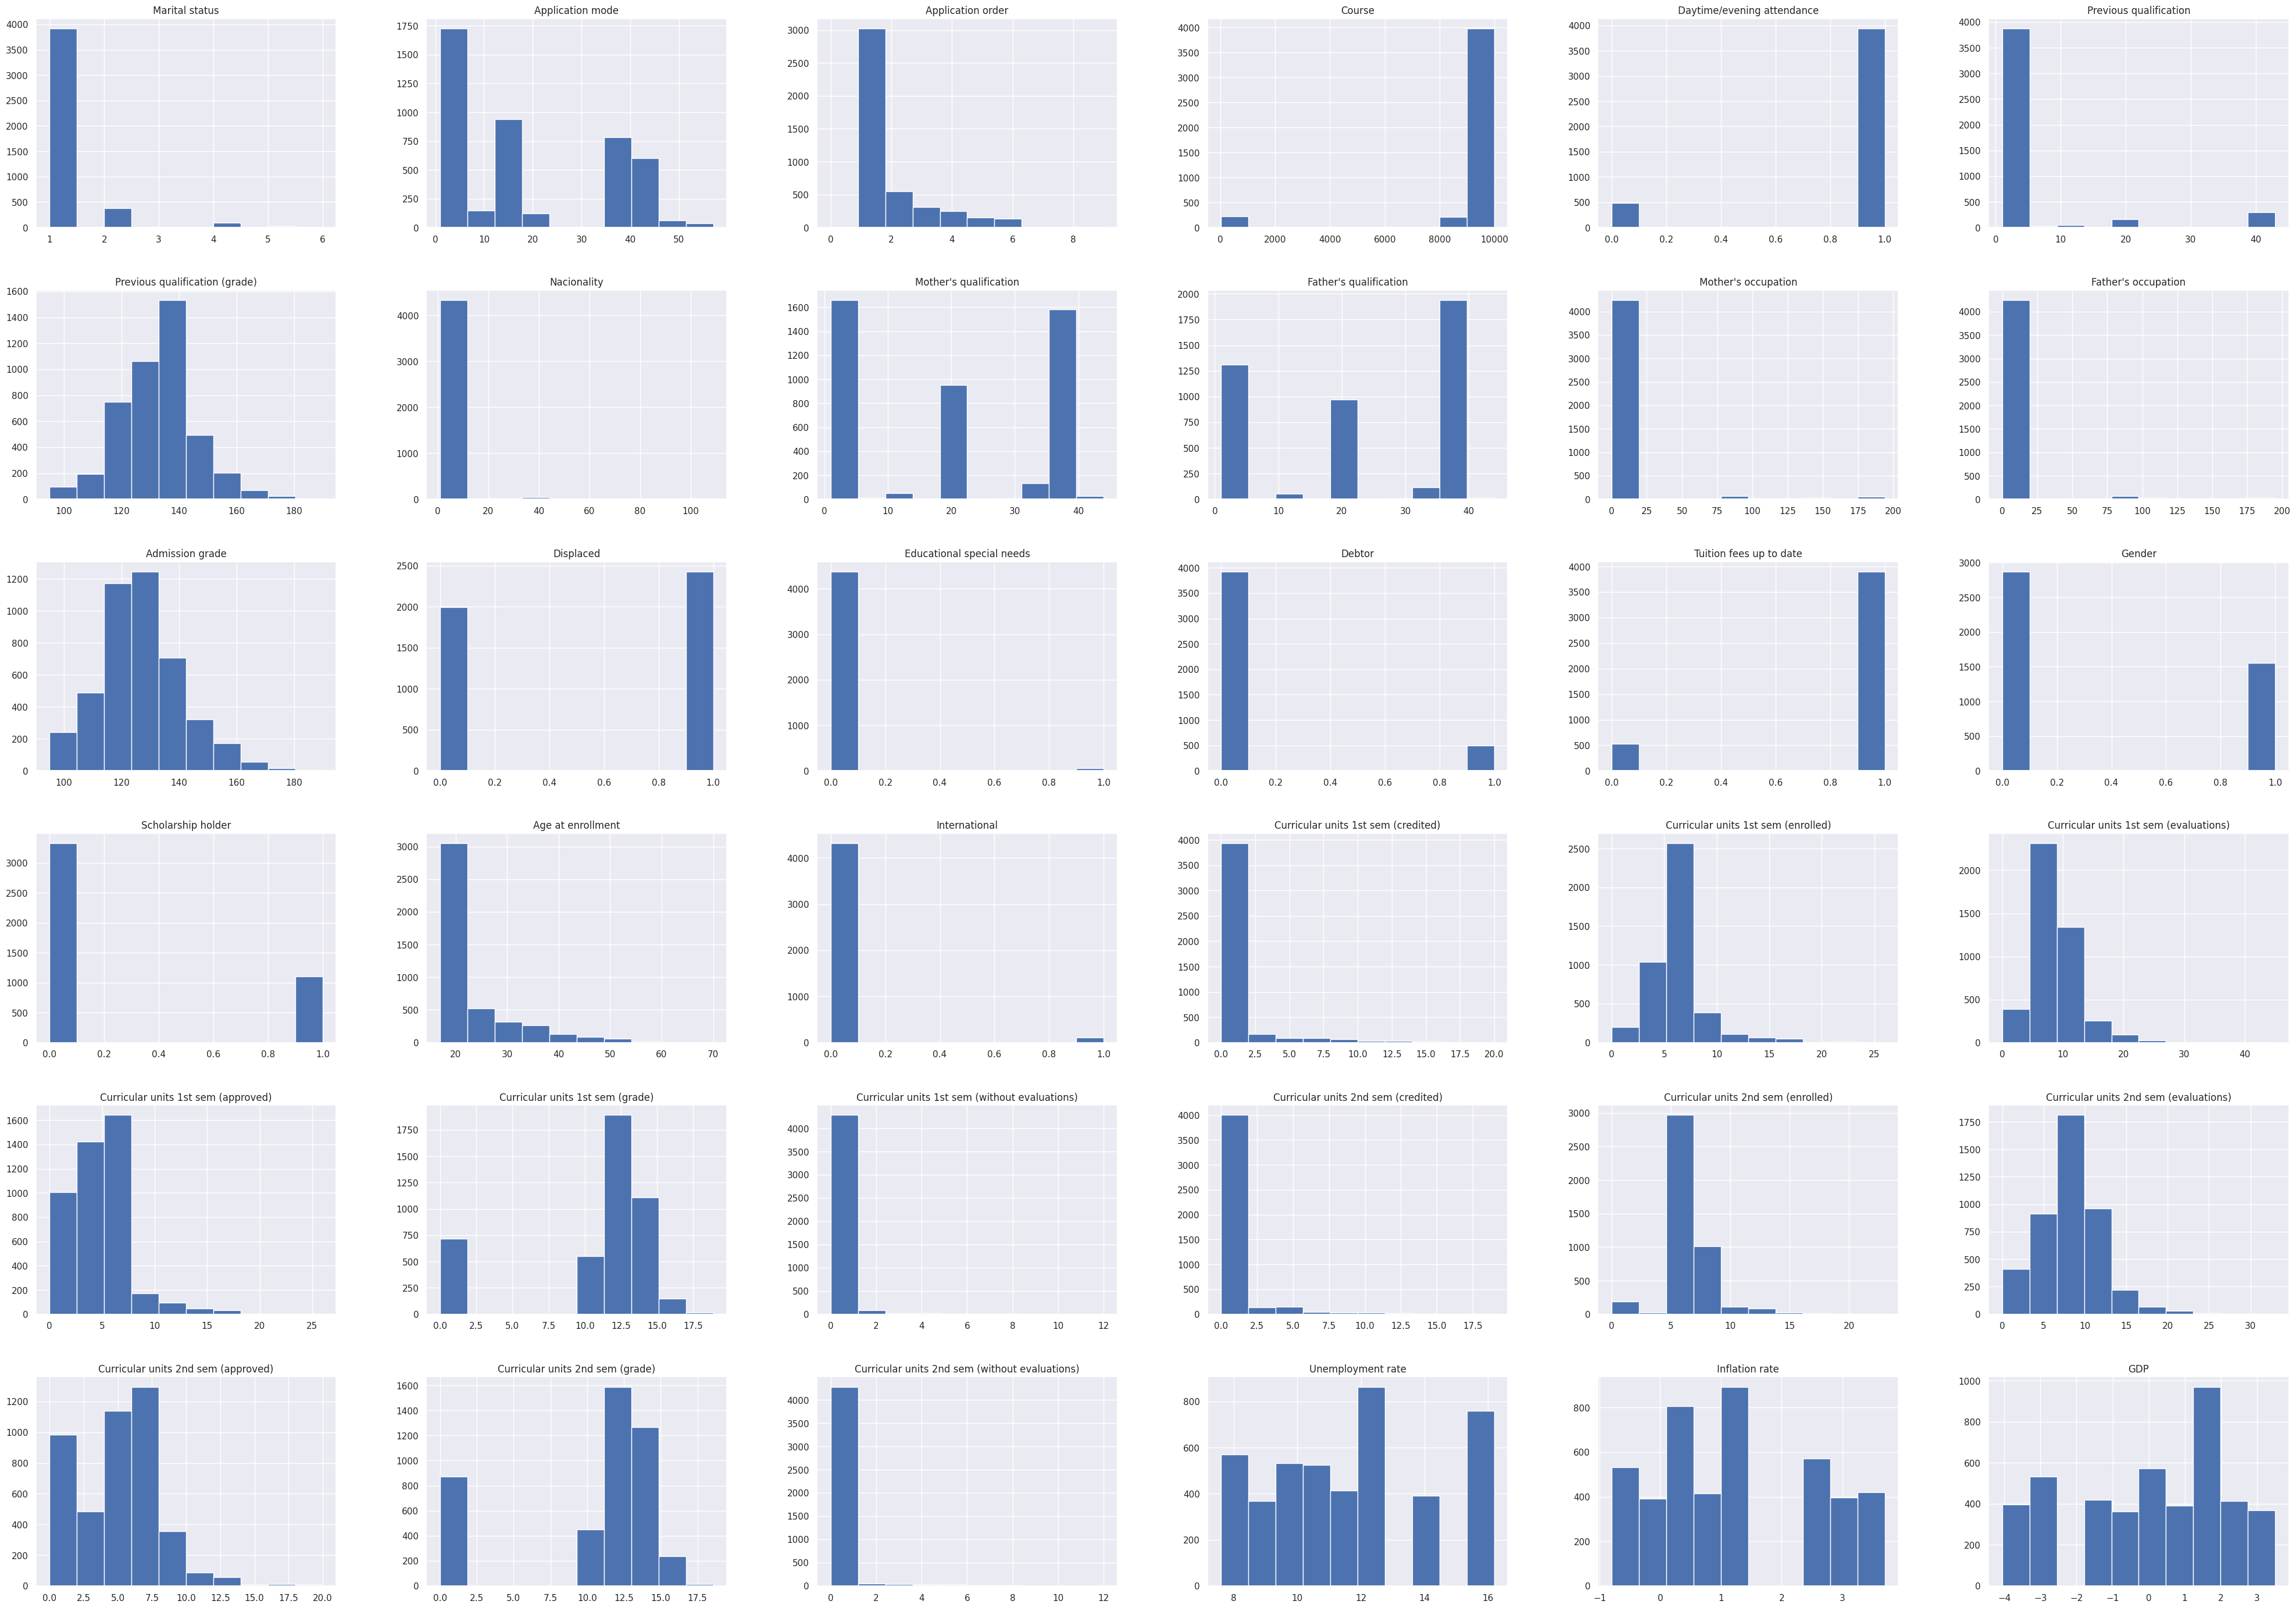

In [28]:
sns.set_theme(style = 'darkgrid')
df.hist(bins=10, figsize=(50, 35));

In [29]:
df.loc[:,'Target'].value_counts()

Graduate    2209
Dropout     1421
Enrolled     794
Name: Target, dtype: int64

In [30]:
# Create a copy to leave de original dataset unchanged
students_df=df.copy() 

# Change the Target to Numerical Value 0 or 1. We are predicting if a Student is gonna Dropout or Graduate, ignoring the ones who are Enrolled.
students_df.replace("Dropout",1,inplace=True) 
students_df.replace("Graduate",0,inplace=True)
students_df.drop(students_df[students_df["Target"]=="Enrolled"].index,inplace=True)
students_df


,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,1
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,0
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,1
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,0
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,0
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,1
4421,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,1
4422,1,1,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,0


In [31]:
df.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd s

In [32]:
df.loc[:,'Application mode'].value_counts()

1     1708
17     872
39     785
43     312
44     213
7      139
18     124
42      77
51      59
16      38
53      35
15      30
5       16
10      10
2        3
57       1
26       1
27       1
Name: Application mode, dtype: int64

In [33]:
df.loc[:,'Application order'].value_counts()

1    3026
2     547
3     309
4     249
5     154
6     137
9       1
0       1
Name: Application order, dtype: int64

In [34]:
df.loc[:,'Course'].value_counts()

9500    766
9147    380
9238    355
9085    337
9773    331
9670    268
9991    268
9254    252
9070    226
171     215
8014    215
9003    210
9853    192
9119    170
9130    141
9556     86
33       12
Name: Course, dtype: int64

In [35]:
df.loc[:,'Daytime/evening attendance'].value_counts()

1    3941
0     483
Name: Daytime/evening attendance, dtype: int64

In [36]:
df.loc[:,'Previous qualification'].value_counts()

1     3717
39     219
19     162
3      126
12      45
40      40
42      36
2       23
6       16
9       11
4        8
38       7
43       6
10       4
15       2
5        1
14       1
Name: Previous qualification, dtype: int64

In [37]:
df.loc[:,'Previous qualification (grade)'].value_counts()

133.1    491
130.0    375
140.0    336
120.0    278
150.0    162
        ... 
133.8      1
175.0      1
117.4      1
188.0      1
126.6      1
Name: Previous qualification (grade), Length: 101, dtype: int64

In [38]:
df.loc[:,'Nacionality'].value_counts()

1      4314
41       38
26       14
22       13
6        13
24        5
100       3
11        3
103       3
21        2
101       2
62        2
25        2
2         2
105       2
32        1
13        1
109       1
108       1
14        1
17        1
Name: Nacionality, dtype: int64

In [39]:
df.loc[:,"Mother's qualification"].value_counts()

1     1069
37    1009
19     953
38     562
3      438
34     130
2       83
4       49
12      42
5       21
40       9
9        8
39       8
41       6
6        4
42       4
43       4
29       3
10       3
11       3
36       3
35       3
30       3
14       2
18       1
22       1
27       1
26       1
44       1
Name: Mother's qualification, dtype: int64

In [40]:
df.loc[:,"Father's qualification"].value_counts()

37    1209
19     968
1      904
38     702
3      282
34     112
2       68
4       39
12      38
39      20
5       18
11      10
36       8
9        5
40       5
22       4
30       4
14       4
29       3
35       2
41       2
43       2
10       2
6        2
26       2
25       1
27       1
33       1
44       1
20       1
42       1
18       1
13       1
31       1
Name: Father's qualification, dtype: int64

In [41]:
df.loc[:,"Mother's occupation"].value_counts()

9      1577
4       817
5       530
3       351
2       318
7       272
0       144
1       102
6        91
90       70
8        36
191      26
99       17
194      11
141       8
123       7
144       6
175       5
192       5
193       4
134       4
10        4
143       3
151       3
132       3
152       2
122       2
153       2
173       1
125       1
131       1
171       1
Name: Mother's occupation, dtype: int64

In [42]:
df.loc[:,"Father's occupation"].value_counts()

9      1010
7       666
5       516
4       386
3       384
8       318
10      266
6       242
2       197
1       134
0       128
90       65
99       19
193      15
144       8
171       8
192       6
163       5
103       4
175       4
135       3
183       3
152       3
123       3
181       3
194       2
182       2
112       2
151       2
172       2
122       2
102       2
153       1
101       1
114       1
174       1
141       1
132       1
134       1
143       1
131       1
161       1
195       1
121       1
124       1
154       1
Name: Father's occupation, dtype: int64

In [43]:
df.loc[:,'Admission grade'].value_counts()

130.0    162
140.0    153
120.0    145
100.0    116
150.0     81
        ... 
150.6      1
184.4      1
102.6      1
147.3      1
156.2      1
Name: Admission grade, Length: 620, dtype: int64

In [44]:
df.loc[:,'Displaced'].value_counts()

1    2426
0    1998
Name: Displaced, dtype: int64

In [45]:
df.loc[:,'Educational special needs'].value_counts()


0    4373
1      51
Name: Educational special needs, dtype: int64

In [46]:
df.loc[:,'Debtor'].value_counts()

0    3921
1     503
Name: Debtor, dtype: int64

In [47]:
df.loc[:,'Tuition fees up to date'].value_counts()

1    3896
0     528
Name: Tuition fees up to date, dtype: int64

In [48]:
df.loc[:,'Gender'].value_counts()

0    2868
1    1556
Name: Gender, dtype: int64

In [49]:
df.loc[:,'Scholarship holder'].value_counts()

0    3325
1    1099
Name: Scholarship holder, dtype: int64

In [50]:
df.loc[:,'Age at enrollment'].value_counts()


18    1036
19     911
20     599
21     322
22     174
24     131
23     108
26      94
25      93
27      91
28      83
29      66
32      61
34      60
31      55
35      49
30      49
33      45
37      42
39      38
36      35
41      31
38      29
43      25
40      23
45      22
44      21
47      18
50      16
42      13
49      13
46      12
48      11
51       7
54       7
53       7
17       5
55       5
52       4
59       3
58       3
57       2
60       2
61       1
70       1
62       1
Name: Age at enrollment, dtype: int64

In [51]:
df.loc[:,'International'].value_counts()


0    4314
1     110
Name: International, dtype: int64

In [52]:
df.loc[:,'Curricular units 1st sem (credited)'].value_counts()


0     3847
2       94
1       85
3       69
6       51
4       47
7       41
5       41
8       31
9       27
11      17
10      15
14      15
13      13
12      12
15       5
18       4
17       3
16       3
19       2
20       2
Name: Curricular units 1st sem (credited), dtype: int64

In [53]:
df.loc[:,'Curricular units 1st sem (enrolled)'].value_counts()


6     1910
5     1010
7      656
8      296
0      180
12      66
10      52
11      45
9       36
15      25
14      22
4       21
13      20
18      19
17      16
16      13
3       10
2        9
1        7
21       6
19       2
23       2
26       1
Name: Curricular units 1st sem (enrolled), dtype: int64

In [54]:
df.loc[:,'Curricular units 1st sem (evaluations)'].value_counts()


8     791
7     703
6     598
9     402
0     349
10    340
11    239
12    223
5     220
13    140
14    105
15     70
16     47
17     33
18     30
19     23
4      19
21     17
20     12
22     10
23      9
2       8
3       6
24      6
1       6
26      4
25      3
27      2
29      2
45      2
32      1
36      1
31      1
28      1
33      1
Name: Curricular units 1st sem (evaluations), dtype: int64

In [55]:
df.loc[:,'Curricular units 1st sem (approved)'].value_counts()


6     1171
5      723
0      718
7      471
4      433
3      269
2      160
1      127
8      108
11      49
12      44
9       40
13      26
10      24
18      15
14      14
17      10
15       7
16       5
21       4
20       3
19       2
26       1
Name: Curricular units 1st sem (approved), dtype: int64

In [56]:
df.loc[:,'Curricular units 1st sem (grade)'].value_counts()


0.000000     718
12.000000    205
13.000000    147
11.000000    138
11.500000     89
            ... 
13.040000      1
15.657143      1
13.331429      1
15.028571      1
14.912500      1
Name: Curricular units 1st sem (grade), Length: 797, dtype: int64

In [57]:
df.loc[:,'Curricular units 1st sem (without evaluations)'].value_counts()


0     4130
1      153
2       79
3       23
4       15
6        6
7        6
5        5
8        4
12       2
10       1
Name: Curricular units 1st sem (without evaluations), dtype: int64

In [58]:
df.loc[:,'Curricular units 2nd sem (credited)'].value_counts()


0     3894
1      107
2       92
4       78
5       68
3       49
6       26
11      20
7       16
9       15
12      14
10      13
8       12
13       9
14       4
15       2
16       2
18       2
19       1
Name: Curricular units 2nd sem (credited), dtype: int64

In [59]:
df.loc[:,'Curricular units 2nd sem (enrolled)'].value_counts()


6     1913
5     1054
8      661
7      304
0      180
11      60
9       50
10      48
12      44
13      37
14      22
4       17
17      12
2        5
19       3
3        3
1        3
15       2
23       2
18       2
16       1
21       1
Name: Curricular units 2nd sem (enrolled), dtype: int64

In [60]:
df.loc[:,'Curricular units 2nd sem (evaluations)'].value_counts()


8     792
6     614
7     563
9     456
0     401
10    355
5     288
11    255
12    226
13    126
14     98
15     73
16     49
17     25
18     22
19     19
4      10
21     10
22     10
20      8
2       4
23      4
26      3
24      3
1       3
3       2
27      2
28      1
25      1
33      1
Name: Curricular units 2nd sem (evaluations), dtype: int64

In [61]:
df.loc[:,'Curricular units 2nd sem (approved)'].value_counts()


6     965
0     870
5     726
4     414
7     331
8     321
3     285
2     198
1     114
11     48
10     38
9      36
12     34
13     21
17      8
14      6
19      3
20      2
16      2
18      2
Name: Curricular units 2nd sem (approved), dtype: int64

In [62]:
df.loc[:,'Curricular units 2nd sem (grade)'].value_counts()


0.000000     870
12.000000    170
11.000000    165
13.000000    150
11.500000     86
            ... 
13.994444      1
11.685714      1
15.657143      1
13.331429      1
11.083333      1
Name: Curricular units 2nd sem (grade), Length: 782, dtype: int64

In [63]:
df.loc[:,'Curricular units 2nd sem (without evaluations)'].value_counts()


0     4142
1      140
2       48
3       35
4       21
5       17
6        8
8        6
7        5
12       2
Name: Curricular units 2nd sem (without evaluations), dtype: int64

In [64]:
df.loc[:,'Unemployment rate'].value_counts()


7.6     571
9.4     533
10.8    525
12.4    445
12.7    419
11.1    414
15.5    397
13.9    390
8.9     368
16.2    362
Name: Unemployment rate, dtype: int64

In [65]:
df.loc[:,'Inflation rate'].value_counts()


 1.4    893
 2.6    571
-0.8    533
 0.5    445
 3.7    419
 0.6    414
 2.8    397
-0.3    390
 0.3    362
Name: Inflation rate, dtype: int64

In [66]:
df.loc[:,'GDP'].value_counts()


 0.32    571
-3.12    533
 1.74    525
 1.79    445
-1.70    419
 2.02    414
-4.06    397
 0.79    390
 3.51    368
-0.92    362
Name: GDP, dtype: int64

In [67]:
df.loc[:,'Target'].value_counts()


Graduate    2209
Dropout     1421
Enrolled     794
Name: Target, dtype: int64

In [68]:
X = df[['Previous qualification', 'Admission grade', 'Displaced', 'Tuition fees up to date', 'Scholarship holder', 'Age at enrollment', 'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)', 'Curricular units 1st sem (without evaluations)', 'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)', 'Curricular units 2nd sem (without evaluations)', 'Unemployment rate', 'Inflation rate', 'GDP']]
scaler = StandardScaler()
scaled = scaler.fit_transform(X)

In [69]:
features = df[['Marital status', 'Application order', 'Course', 'Previous qualification', 'Nacionality', "Mother's qualification", "Father's qualification", "Mother's occupation", "Father's occupation", 'Educational special needs', 'Debtor', 'Gender']]